# Problem Statement
Classify whether a woman in the given sample of data had an affair.

Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education

(9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation

(1 = student, 2 = farming/semi-skilled/unskilled, 3 ="white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

occupation_husb: husband's occupation

(1 = student, 2 = farming/semi-skilled/unskilled, 3 ="white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

affairs: time spent in extra-marital affairs

In [1]:
# import Libraries into working environmnt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()

In [2]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.shape

(6366, 10)

In [5]:
X.shape

(6366, 17)

In [6]:
y

array([1., 1., 1., ..., 0., 0., 0.])

### Descriptive Stats

In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


<Figure size 14400x7200 with 0 Axes>

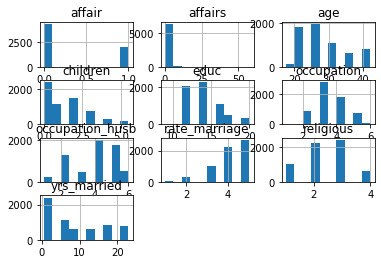

In [12]:
# plot all of the columns
%matplotlib inline
plt.figure(figsize=(200,100))
dta.hist();

### Split the data into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4456, 17)
(4456,)
(1910, 17)
(1910,)


### Logistic Regression with statsmodel

In [14]:
#Since we're doing a logistic regression, we're going to use the statsmodels Logit function.
logit = sm.Logit(y_train, X_train)

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.544479
         Iterations 6


### Predictions by the statsmodel

In [15]:
predictions =  result.predict(X_test)

In [16]:
predictions

2764    0.653211
4481    0.087718
5360    0.273074
5802    0.249471
1220    0.249630
          ...   
3053    0.144139
1875    0.207506
5851    0.437646
4962    0.190124
1995    0.249630
Length: 1910, dtype: float64

### scipy version 1.0.0 does not support chisqprob, this has been missed.
Hence we might get an error AttributeError: module 'scipy.stats' has no attribute 'chisqprob'. Below code is the workaround.


In [17]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Interpreting the results

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1360
Time:                        06:12:47   Log-Likelihood:                -2426.2
converged:                       True   LL-Null:                       -2808.3
Covariance Type:            nonrobust   LLR p-value:                2.844e-152
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4842      0.777      3.198      0.001       0.961       4.007
occ_2             0.9414      0.658      1.432      0.152      -0.347       2.230
occ_3             1.2324      0.652      1.890      0.059      -0.046       2.511
occ_4             0.9731      0.653      1.490      0.136      -0.307       2.254
occ_5             1.6017      0.657      2.436      0.015       0.313       2.890
occ_6             1.8242      0.707      2.581      0.010       0.439       3.209
occ_husb_2        0.0649      0.215      0.302      0.762      -0.356       0.486
occ_husb_3        0.1976      0.235      0.841      0.400      -0.263       0.658
occ_husb_4        0.0304      0.208      0.146      0.884      -0.377       0.438
occ_husb_5       -0.0052      0.210     -0.025      0.980      -0.417       0.406
occ_husb_6       -0.0183      0.236     -0.078      0.938      -0.481       0.445
rate_marriage    -0.7145      0.038    -18.929      0.000      -0.788      -0.640
age              -0.0577      0.012     -4.686      0.000      -0.082      -0.034
yrs_married       0.1081      0.013      8.243      0.000       0.082       0.134
children         -0.0126      0.038     -0.329      0.742      -0.088       0.062
religious        -0.3889      0.042     -9.342      0.000      -0.470      -0.307
educ              0.0046      0.021      0.224      0.823      -0.036       0.045
=================================================================================
"""

### Logistic Regression with scikit-learn

In [19]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### Exploration

In [20]:
# people having affair is represented with 1 and not having affair is represented with 0
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [21]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


#### We can see that on average, women who have affairs rate their marriages lower.
checking other parameter like rate_marriage

In [22]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


#### An increase in age, yrs_married, and children appears to correlate with increase in affairs.

### DATA VISUALIZATION

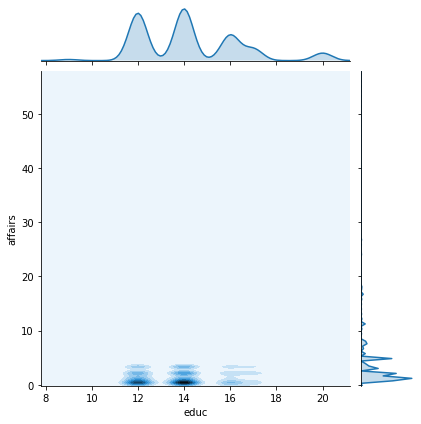

In [23]:
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')

Text(0, 0.5, 'Frequency')

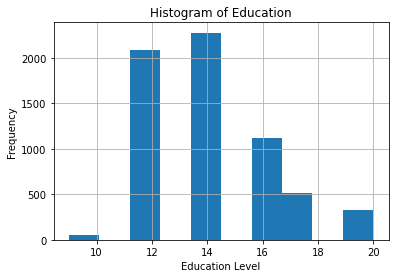

In [24]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

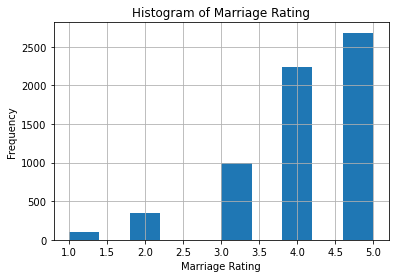

In [25]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

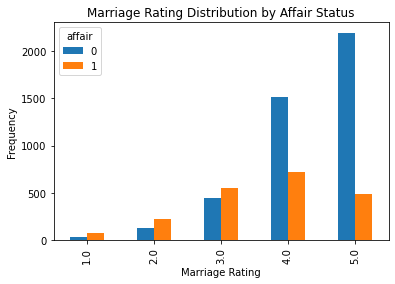

In [26]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

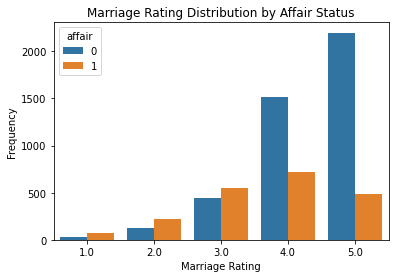

In [27]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

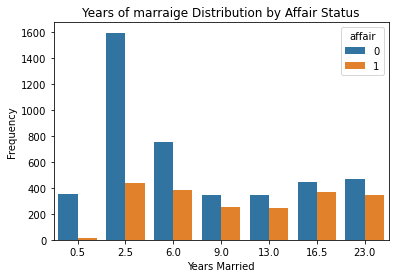

In [28]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

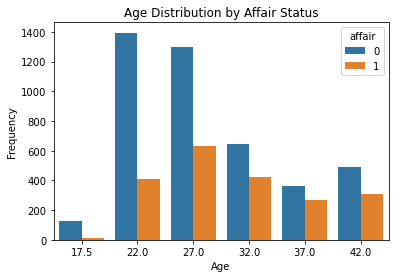

In [29]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Model Evaluation Using a Validation Set

In [30]:
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4456, 17)
(4456,)
(1910, 17)
(1910,)


### Build the model and fit the training data

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\anash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
model.score(X_train,y_train)

0.723967684021544

### The training data set has an accuracy of 73 %

In [33]:
# predict class labels for the test set
predicted = model.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [34]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs

array([[0.35142463, 0.64857537],
       [0.90952591, 0.09047409],
       [0.72576585, 0.27423415],
       ...,
       [0.55736688, 0.44263312],
       [0.81213955, 0.18786045],
       [0.74729605, 0.25270395]])

#### As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

## Evaluate the model

In [35]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.7459632504384129


### The accuracy of the model is 73% whic is the same as that encountered for training data.
## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

In a two-class prediction problem (binary classification), in which the outcomes are labeled either as positive (p) and negative (n). There are four possible outcomes from a binary classifier. If the outcome from a prediction is p and the actual value is also p, then it is called a true positive (TP); however if the actual value is n then it is said to be a false positive (FP). Conversely, a true negative (TN) has occurred when both the prediction outcome and the actual value are n, and false negative (FN) is when the prediction outcome is n while the actual value is p.

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

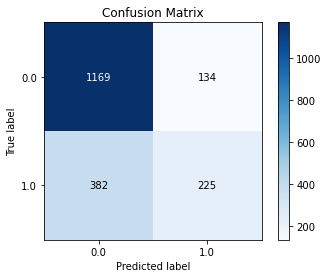

In [36]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predicted)

# ROC : Receiver Operating Characteristic Curve
A receiver operating characteristic curve, i.e. ROC curve, is a graphicale. plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection[1] in machine learning.

C:\Users\anash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

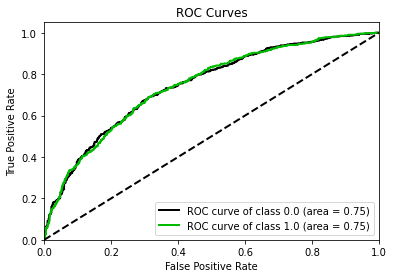

In [37]:
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])

In [38]:
#accuracy report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [40]:
from sklearn.metrics import  confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)

numpy.ndarray

In [41]:
cf.shape

(2, 2)

## Calculation of Precision Recall and F1 score

In [42]:
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.6267409470752089 , Recall : 0.37067545304777594, F1 : 0.4658385093167702


### Calculation of True Positive Rate and False Positive Rate

In [43]:
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.37067545304777594, False Positive Rate : 0.10283960092095165


## Model Evaluation Using Cross-Validation
Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.

In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estim

Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously

## Predicting the Probability of an Affair
let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer

In [44]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))

array([[0.773065, 0.226935]])

#### The predicted probability of an affair is 23%.

#### let's predict the probability of an affair for a random woman not present in the dataset. She's a 30-year-old teacher who graduated college, has been married for 10 years, has 3 children, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer

In [45]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]]))


array([[0.68618426, 0.31381574]])

### The predicted probability of an affair is 31%.